Google collab link:
https://colab.research.google.com/drive/1uqlJkgLCs1Inn9w1UagLdPYTYlMkMw-K?usp=sharing

# **Import Libraries**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# **Importing Train and Test Dataset**

In [2]:
dataframe_train = pd.read_csv('train.csv').drop(['date'],axis=1)
dataframe_test = pd.read_csv('test.csv').drop(['date'],axis=1)
dataframe_train.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,9.761000e+03,9.761000e+03,9761.000000,9761.000000,9761.000000,9.761000e+03,9761.000000,9761.000000,9761.000000,9761.000000,9761.00000,9761.000000,9761.000000,9761.000000,9761.000000,9761.000000,9761.000000,9761.000000,9761.000000,9761.000000
mean,4.605288e+09,5.428336e+05,3.375884,2.117175,2086.734146,1.521526e+04,1.486067,0.008401,0.248028,3.415531,7.66151,1793.291159,293.442987,1970.799508,86.066592,98077.790185,47.560052,-122.214322,1992.359697,12824.785165
std,2.876044e+09,3.797779e+05,0.960697,0.773971,927.194303,4.126673e+04,0.532317,0.091275,0.787877,0.650552,1.18268,835.763817,442.612722,29.240009,405.417369,53.203594,0.140236,0.139895,687.322247,26518.337402
min,1.200019e+06,8.000000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.00000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.514000,620.000000,660.000000
25%,2.126049e+09,3.200000e+05,3.000000,1.750000,1420.000000,5.100000e+03,1.000000,0.000000,0.000000,3.000000,7.00000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.467800,-122.327000,1490.000000,5160.000000
50%,3.905041e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.642000e+03,1.500000,0.000000,0.000000,3.000000,7.00000,1570.000000,0.000000,1975.000000,0.000000,98065.000000,47.572200,-122.229000,1840.000000,7660.000000
75%,7.338403e+09,6.490000e+05,4.000000,2.500000,2570.000000,1.066000e+04,2.000000,0.000000,0.000000,4.000000,8.00000,2230.000000,570.000000,1996.000000,0.000000,98117.000000,47.680400,-122.126000,2370.000000,10113.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,12050.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.00000,8860.000000,3480.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.319000,5790.000000,560617.000000


# **Corelation Matrix**
Correlation Matrix is basically a covariance matrix.  It is a matrix in which i-j position defines the correlation between the ith and jth parameter of the given data-set.
Correlation summarizes the strength and direction of the linear (straight-line) association between two quantitative variables. Denoted by r, it takes values between -1 and +1. A positive value for r indicates a positive association, and a negative value for r indicates a negative association.
The closer r is to 1 the closer the data points fall to a straight line, thus, the linear association is stronger. The closer r is to 0, making the linear association weaker.

In [3]:
dataframe_train.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.006011,-0.002571,0.005821,-0.007559,-0.130303,0.007793,0.000834,0.023355,-0.015321,0.012491,-0.006447,-0.003660,0.027053,-0.024900,-0.012130,0.009167,0.034395,-0.001315,-0.137562
price,-0.006011,1.000000,0.300777,0.527512,0.705044,0.094146,0.262955,0.274953,0.399711,0.044754,0.665594,0.611450,0.322369,0.051737,0.120439,-0.055619,0.299191,0.023718,0.584829,0.077960
bedrooms,-0.002571,0.300777,1.000000,0.506070,0.560989,0.028895,0.181042,-0.006803,0.079863,0.036135,0.342305,0.462514,0.301829,0.155102,0.018625,-0.148339,-0.010547,0.117168,0.376457,0.018149
bathrooms,0.005821,0.527512,0.506070,1.000000,0.758930,0.079435,0.501899,0.061483,0.182988,-0.115382,0.660925,0.692911,0.281433,0.499589,0.044756,-0.201454,0.018453,0.217697,0.566076,0.068722
sqft_living,-0.007559,0.705044,0.560989,0.758930,1.000000,0.162786,0.366219,0.097203,0.285735,-0.047938,0.764819,0.878989,0.435069,0.322723,0.043627,-0.203761,0.054830,0.240170,0.758081,0.163545
sqft_lot,-0.130303,0.094146,0.028895,0.079435,0.162786,1.000000,-0.003543,0.029420,0.099221,-0.008722,0.115611,0.180913,-0.000601,0.054043,0.001219,-0.126091,-0.092245,0.224524,0.145285,0.719922
floors,0.007793,0.262955,0.181042,0.501899,0.366219,-0.003543,1.000000,0.022443,0.031938,-0.265390,0.461545,0.534801,-0.242675,0.481926,0.013655,-0.064479,0.044827,0.134683,0.289238,-0.013269
waterfront,0.000834,0.274953,-0.006803,0.061483,0.097203,0.029420,0.022443,1.000000,0.402725,0.024030,0.088039,0.064297,0.082214,-0.027010,0.101684,0.023656,-0.009410,-0.039227,0.097196,0.028499
view,0.023355,0.399711,0.079863,0.182988,0.285735,0.099221,0.031938,0.402725,1.000000,0.059969,0.258123,0.170286,0.277021,-0.056361,0.109750,0.075834,0.005503,-0.074630,0.292435,0.079904
condition,-0.015321,0.044754,0.036135,-0.115382,-0.047938,-0.008722,-0.265390,0.024030,0.059969,1.000000,-0.133313,-0.153713,0.189828,-0.357396,-0.055525,0.003410,-0.017622,-0.106514,-0.080423,0.002253


# **Co-relation heatmap**
What is a heatmap?
A heatmap is a two-dimensional graphical representation of data where the individual values that are contained in a matrix are represented as colors.
Observation from heatmap
From the heatmap we can see that attributes id(-0.01), sqft_lot
(0.09), condition(0.04), yr_built(0.05), zipcode(-0.06), long(0.02) and sqft_lot15(0.08) have poor co-relation with price.

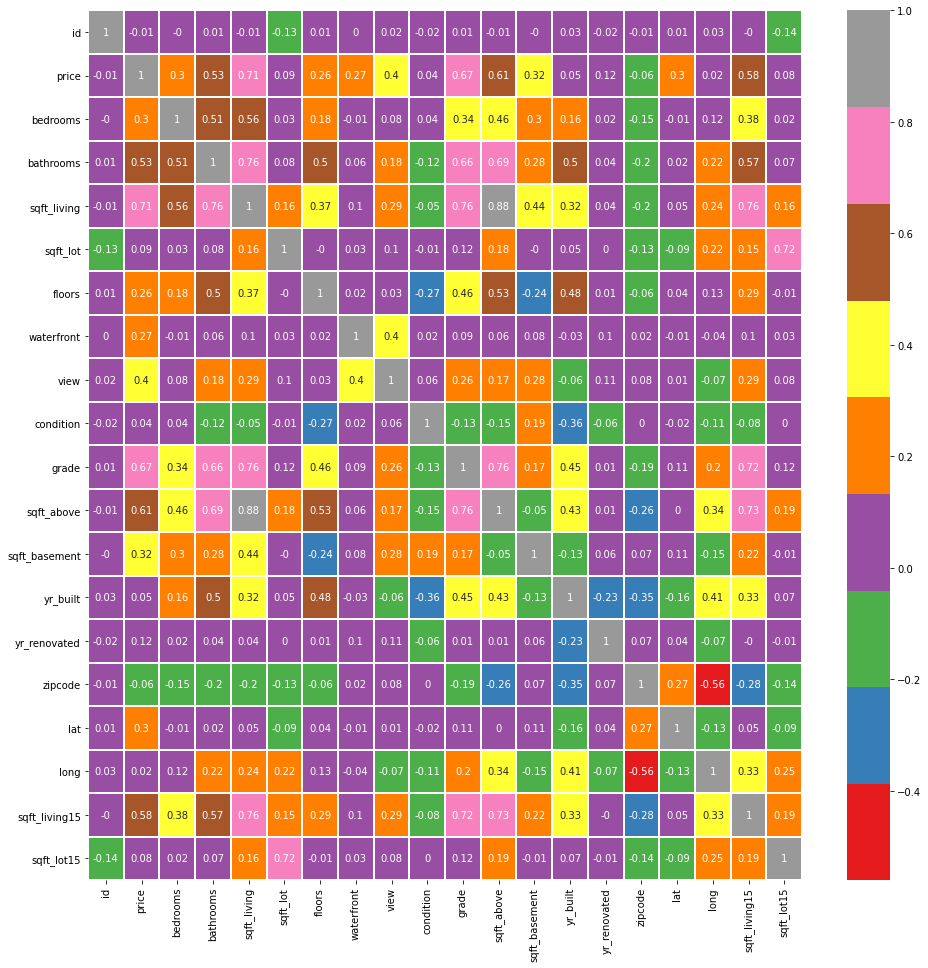

In [4]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(16, 16))
correlation_matrix = dataframe_train.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True,cmap="Set1",linewidth=1.0)

# **Preparing Training Data**

In [5]:
x_train = dataframe_train.iloc[:,[2,3,4,6,7,8,10,11,12,14,16,18]].values
y_train = dataframe_train.iloc[:, [1]].values

# **What is Polynomial Regression ?**
Polynomial Regression is a form of linear regression in which the relationship between the independent variable x and dependent variable y is modeled as an nth degree polynomial. Polynomial regression fits a nonlinear relationship between the value of x and the corresponding conditional mean of y, denoted E(y |x).
General equation is: 
y = a + b1x + b2x^2 +....+ bnx^n

# **Why Polynomial Regression:**
There are some relationships that a researcher will hypothesize is curvilinear. Clearly, such type of cases will include a polynomial term.
Inspection of residuals. If we try to fit a linear model to curved data, a scatter plot of residuals (Y axis) on the predictor (X axis) will have patches of many positive residuals in the middle. Hence in such situation it is not appropriate.
An assumption in usual multiple linear regression analysis is that all the independent variables are independent. In polynomial regression model, this assumption is not satisfied.

# **Polynomial Regression Degree 1**

In [6]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg_1 = PolynomialFeatures(degree=1)
x_poly_train = poly_reg_1.fit_transform(x_train)
from sklearn.linear_model import LinearRegression
lin_reg_1=LinearRegression()
lin_reg_1.fit(x_poly_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# Accuracy score

In [7]:
x_test = dataframe_train.iloc[:,[2,3,4,6,7,8,10,11,12,14,16,18]].values
y_test = dataframe_train.iloc[:, [1]].values
x_poly_test = poly_reg_1.fit_transform(x_test)
lin_reg_1.score(x_poly_test,y_test)

0.6611468094715179

# **Polynomial Regression Degree 2**

In [8]:
poly_reg_2 = PolynomialFeatures(degree=2)
x_poly_train = poly_reg_2.fit_transform(x_train)
lin_reg_2=LinearRegression()
lin_reg_2.fit(x_poly_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# Accuracy score

In [9]:
x_poly_test = poly_reg_2.fit_transform(x_test)
lin_reg_2.score(x_poly_test,y_test)

0.7737899378597638

# **Polynomial Regression Degree 3**

In [10]:
poly_reg_3 = PolynomialFeatures(degree=3)
x_poly_train = poly_reg_3.fit_transform(x_train)
lin_reg_3=LinearRegression()
lin_reg_3.fit(x_poly_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# Accuracy score

In [11]:
x_poly_test = poly_reg_3.fit_transform(x_test)
lin_reg_3.score(x_poly_test,y_test)

0.8226970545024656

# **Polynomial Regression Degree 4**

In [12]:
poly_reg_4 = PolynomialFeatures(degree=4)
x_poly_train = poly_reg_4.fit_transform(x_train)
lin_reg_4=LinearRegression()
lin_reg_4.fit(x_poly_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# Accuracy score

In [13]:
x_poly_test = poly_reg_4.fit_transform(x_test)
lin_reg_4.score(x_poly_test,y_test)

0.8629620522770717

**Conclusion**
From above we can conclude that degree 4 polynomial regression is giving best accuracy score of 0.86.